# Hands-on at the ARMI Terminal

This tutorial will walk you through some exploration with ARMI on the command
line with the goal of exposing you to some of the capabilities
and organization of information in the ARMI system.

## Initializing and Exploring the ARMI Model
First we need to get some inputs. We built some from scratch in
[Building input files for a fast reactor](walkthrough_inputs.html)
and we pick those up and use them here as well:


You can load these inputs using armi's ``init`` function. This will build an **Operator**, a **Reactor**, and an **Interface Stack** full of various interfaces.

In [1]:
# you can only configure an app once
import armi
if not armi.isConfigured():
    armi.configure(armi.apps.App())


       +===================================================+
       |            _      ____     __  __    ___          |
       |           / \    |  _ \   |  \/  |  |_ _|         |
       |          / _ \   | |_) |  | |\/| |   | |          |
       |         / ___ \  |  _ <   | |  | |   | |          |
       |        /_/   \_\ |_| \_\  |_|  |_|  |___|         |
       |        Advanced  Reactor  Modeling Interface      |
       |                                                   |
       |                    version 0.3.0                  |
       |                                                   |
       +===================================================+


In [2]:
o=armi.init(fName="anl-afci-177.yaml");
o.r.core.sortAssemsByRing() # makes innermost assemblies appear first

=========== Settings Validation Checks ===========


=========== Case Information ===========


[info] ---------------------  ------------------------------------------------------------
       Case Title:            anl-afci-177
       Case Description:      ANL-AFCI-177 CR 1.0 metal core but with HALEU instead of TRU
       Run Type:              Standard - Operator
       Current User:          runner
       ARMI Location:         /home/runner/work/armi/armi/armi
       Working Directory:     /home/runner/work/armi/armi/doc/tutorials
       Python Interpreter:    3.9.19 (main, May  8 2024, 14:40:19)
                              [GCC 11.4.0]
       Master Machine:        fv-az1442-821
       Number of Processors:  1
       Date and Time:         Thu May 16 16:48:09 2024
       ---------------------  ------------------------------------------------------------


=========== Input File Information ===========


[info] --------------------------------------------------------------------  ------------------------------  ------------
       Input Type                                                            Path                            SHA-1 Hash
       --------------------------------------------------------------------  ------------------------------  ------------
       Case Settings                                                         anl-afci-177.yaml               f7dbd06fb4
       Blueprints                                                            anl-afci-177-blueprints.yaml    04761fb2b3
       Included blueprints                                                   anl-afci-177-coreMap.yaml       5904530cb2
       Geometry                                                                                              MISSING
       <Setting shuffleLogic value:anl-afci-177-fuelManagement.py default:>  anl-afci-177-fuelManagement.py  622957b035
       --------------------------------

=========== Reactor Cycle Information ===========


[info] ---------------------------  -----------------------------------------------------------------
       Reactor Thermal Power (MW):  1000.0
       Number of Cycles:            10
       Cycle Lengths:               411.11, 411.11, 411.11, 411.11, 411.11, 411.11, 411.11, 411.11,
                                    411.11, 411.11
       Availability Factors:        0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9
       Power Fractions:             [1.0, 1.0], [1.0, 1.0], [1.0, 1.0], [1.0, 1.0], [1.0, 1.0], [1.0,
                                    1.0], [1.0, 1.0], [1.0, 1.0], [1.0, 1.0], [1.0, 1.0]
       Step Lengths (days):         [184.9995, 184.9995], [184.9995, 184.9995], [184.9995, 184.9995],
                                    [184.9995, 184.9995], [184.9995, 184.9995], [184.9995, 184.9995],
                                    [184.9995, 184.9995], [184.9995, 184.9995], [184.9995, 184.9995],
                                    [184.9995, 184.9995]
       -------------------

=========== Constructing Reactor and Verifying Inputs ===========


[info] Constructing the `core`


=========== Adding Assemblies to <Core: core id:139737183891616> ===========


[info] Will expand HE, NA, SI, CR, MN, FE, NI, ZR, MO, W elementals to have natural isotopics


[info] Constructing assembly `inner fuel`


[warn] No component matched Flags.CLAD in <reflector block-bol-000 at ExCore XS: A BU GP: A>. Returning None


[warn] Some component was missing in <reflector block-bol-000 at ExCore XS: A BU GP: A> so pin-to-duct gap not calculated


[warn] Cannot get pin pitch in <reflector block-bol-000 at ExCore XS: A BU GP: A> because it does not have a wire and a clad


[warn] The gap between wire wrap and clad in block <plenum block-bol-006 at ExCore XS: A BU GP: A> was 3.999999999998449e-05 cm. Expected 0.0.


[info] Constructing assembly `middle core fuel`


[warn] Some component was missing in <reflector block-bol-000 at ExCore XS: B BU GP: A> so pin-to-duct gap not calculated


[warn] Cannot get pin pitch in <reflector block-bol-000 at ExCore XS: B BU GP: A> because it does not have a wire and a clad


[warn] The gap between wire wrap and clad in block <plenum block-bol-006 at ExCore XS: B BU GP: A> was 3.999999999998449e-05 cm. Expected 0.0.


[info] Constructing assembly `outer core fuel`


[warn] Some component was missing in <reflector block-bol-000 at ExCore XS: C BU GP: A> so pin-to-duct gap not calculated


[warn] Cannot get pin pitch in <reflector block-bol-000 at ExCore XS: C BU GP: A> because it does not have a wire and a clad


[warn] The gap between wire wrap and clad in block <plenum block-bol-006 at ExCore XS: C BU GP: A> was 3.999999999998449e-05 cm. Expected 0.0.


[info] Constructing assembly `radial reflector`


[warn] Some component was missing in <reflector block-bol-000 at ExCore XS: A BU GP: A> so pin-to-duct gap not calculated


[info] Constructing assembly `radial shield`


[warn] Temperature 597.0 out of range (25 to 500) for B4C linear expansion percent


[warn] No component matched Flags.WIRE in <radial shield block-bol-000 at ExCore XS: A BU GP: A>. Returning None


[warn] Cannot get pin pitch in <radial shield block-bol-000 at ExCore XS: A BU GP: A> because it does not have a wire and a clad


[info] Constructing assembly `control`


[warn] Could not create a spatialGrid for block control, multiplicities are not 1 or N they are {1.0}


[info] Constructing assembly `ultimate shutdown`


=========== Verifying Assembly Configurations ===========


=========== Summarizing Source of Material Data for <Core: core id:139737183891616> ===========


[info] ---------------  -----------------  ----------------------------
       Material Name    Source Location    Property Data was Modified
                                           from the Source?
       ---------------  -----------------  ----------------------------
       B4C              ARMI               False
       HT9              ARMI               False
       Sodium           ARMI               False
       UZr              ARMI               False
       Void             ARMI               False
       ---------------  -----------------  ----------------------------


=========== Applying Geometry Modifications ===========


[info] Resetting the state of the converted reactor core model in <EdgeAssemblyChanger>


[info] Updating spatial grid pitch data for hex geometry


=========== Initializing Mesh, Assembly Zones, and Nuclide Categories ===========


[info] Nuclide categorization for cross section temperature assignments:
       ------------------  -----------------------------------------------------------
       Nuclide Category    Nuclides
       ------------------  -----------------------------------------------------------
       Fuel                CM245, LFP40, ZR91, PU241, U234, ZR96, AM243, AM241, PU239,
                           PU236, LFP41, DUMP2, CM244, LFP39, HE4, DUMP1, U238, NP238,
                           U235, PU240, CM242, CM243, NP237, U236, LFP35, CM246,
                           CM247, AM242M, ZR90, PU242, LFP38, PU238, ZR94, ZR92
       Coolant             NA23
       Structure           NI58, SI28, MO98, W183, MN55, NI64, V, MO100,
                           FE58, NI62, CR50, W184, NI60, C, FE56, SI30,
                           FE54, CR52, FE57, NI61, MO95, MO96, MO92, MO97,
                           B11, MO94, B10, CR53, SI29, CR54, W186, W182
       ------------------  -------------------------------

[info] Constructing the `Spent Fuel Pool`


=========== Creating Interfaces ===========


=========== Interface Stack Summary  ===========


[info] -------  ------------------------  ---------------  ----------  ---------  -----------  ------------
         Index  Type                      Name             Function    Enabled    EOL order    BOL forced
       -------  ------------------------  ---------------  ----------  ---------  -----------  ------------
            01  Main                      main                         Yes        Reversed     No
            02  FissionProductModel       fissionProducts              Yes        Normal       No
            03  FuelHandler               fuelHandler                  Yes        Normal       No
            04  CrossSectionGroupManager  xsGroups                     Yes        Normal       No
            05  HistoryTracker            history                      Yes        Normal       No
            06  Report                    report                       Yes        Normal       No
            07  Database                  database                     Yes        Normal  

===========  Triggering Init Event ===========


=========== 01 - main                           Init            ===========


=========== 02 - fissionProducts                Init            ===========


=========== 03 - fuelHandler                    Init            ===========


=========== 04 - xsGroups                       Init            ===========


=========== 05 - history                        Init            ===========


=========== 06 - report                         Init            ===========


=========== 07 - database                       Init            ===========


=========== 08 - memoryProfiler                 Init            ===========


=========== 09 - snapshot                       Init            ===========


===========  Completed Init Event ===========


In [3]:
core = o.r.core
core.getAssemblies()[:25] # only print the first 25

[<radial shield Assembly A0005 at 011-056>,
 <radial reflector Assembly A0004 at 009-045>,
 <radial reflector Assembly A0010 at 010-051>,
 <radial shield Assembly A0016 at 011-057>,
 <control Assembly A0003 at 007-034>,
 <outer core fuel Assembly A0009 at 008-040>,
 <radial reflector Assembly A0015 at 009-046>,
 <radial reflector Assembly A0021 at 010-052>,
 <radial shield Assembly A0027 at 011-058>,
 <middle core fuel Assembly A0002 at 005-023>,
 <middle core fuel Assembly A0008 at 006-029>,
 <outer core fuel Assembly A0014 at 007-035>,
 <outer core fuel Assembly A0020 at 008-041>,
 <radial reflector Assembly A0026 at 009-047>,
 <radial reflector Assembly A0033 at 010-053>,
 <radial shield Assembly A0039 at 011-059>,
 <inner fuel Assembly A0001 at 003-012>,
 <middle core fuel Assembly A0007 at 004-018>,
 <middle core fuel Assembly A0013 at 005-024>,
 <middle core fuel Assembly A0019 at 006-030>,
 <outer core fuel Assembly A0025 at 007-036>,
 <outer core fuel Assembly A0032 at 008-042>

You can drill down the hierarchy for a particular assembly:

In [4]:
core = o.r[0]
print(core)
assem = core[1]
print(assem)
block = assem[5]
print(block)
print(f"Block's parent is: {block.parent}")
components = block.getChildren()
print(components)
material = components[0].material
print(material)

<Core: core id:139737183891616>
<inner fuel Assembly A0006 at 002-001>
<fuel B0006-005 at 002-001-005 XS: A BU GP: A>
Block's parent is: <inner fuel Assembly A0006 at 002-001>
[<Circle: fuel>, <Circle: bond>, <Circle: clad>, <Helix: wire>, <DerivedShape: coolant>, <Hexagon: duct>, <Hexagon: intercoolant>]
<Material: UZr>


## Exploring the *state* of the reactor
State can be explored using a variety of framework methods, as well as looking at state *parameters*. Let's first try out some methods to find out how much U-235 is in the model and what the average uranium enrichment is:

In [5]:
u235 = core.getMass('U235')
u238 = core.getMass('U238')
print(f"The core contains {u235} grams of U-235")
print(f"The average fissile enrichment is {u235/(u235+u238)}")

The core contains 913110.7780886302 grams of U-235
The average fissile enrichment is 0.1615298013245032


That's how much U-235 is in the 1/3 core. If we want the total mass (including all nuclides), we can just leave the argument out:

In [6]:
core.getMass()/1.e6

27.630279585150355

In [7]:
core.getMass?

Furthermore, you can get a list of available methods by pressing the tab key. Try `core.` followed by `[Tab]`. Try out some options!

Next, lets find out what the number density of U235 is in a particular fuel block. We'll use the *FLAGS* system to select a particular type of block (in this case, a fuel block):

In [8]:
from armi.reactor.flags import Flags
b = core.getFirstBlock(Flags.FUEL)
print(f"U-235 ndens: {b.getNumberDensity('U235'):.4e} (atoms/bn-cm)")
print(f"Block name: {b.getName()}")
print(f"Block type: {b.getType()}")

U-235 ndens: 1.5940e-03 (atoms/bn-cm)
Block name: B0000-001
Block type: fuel


You can find lots of other details about this block with:

In [9]:
b.printContents(includeNuclides=False)

[impt] <fuel B0000-001 at 001-001-001 XS: A BU GP: A>


[impt] <Circle: fuel>


[impt] ---------------------------------------------------------------------------------------------
       Fuel Dimensions -  Of First Fuel Block
                                      Tcold (25.0)                   Thot (500.0)                   
       ---------------------------------------------------------------------------------------------
       Inner Diameter (cm)            0.0                            0.0                            
       Material                       UZr                                                           
       Multiplicity                   271                            271                            
       Name                           fuel                                                          
       Outer Diameter (cm)            0.6029                         0.6086118601525807


[impt] <Circle: bond>


[impt] ---------------------------------------------------------------------------------------------
       Bond Dimensions -  Of First Fuel Block
                                      Tcold (447.0)                  Thot (447.0)                   
       ---------------------------------------------------------------------------------------------
       Inner Diameter (cm)            0.6029                         0.6086118601525807             
       Material                       Sodium                                                        
       Multiplicity                   271                            271                            
       Name                           bond                                                          
       Outer Diameter (cm)            0.6962                         0.6996347645979837             
       Thickness (cm)                 0.0466500                      0.0455115


[impt] <Circle: clad>


[impt] ---------------------------------------------------------------------------------------------
       Cladding Dimensions -  Of First Fuel Block
                                      Tcold (25.0)                   Thot (450.0)                   
       ---------------------------------------------------------------------------------------------
       Inner Diameter (cm)            0.6962                         0.6996347645979837             
       Material                       HT9                                                           
       Multiplicity                   271                            271                            
       Name                           clad                                                          
       Outer Diameter (cm)            0.808                          0.8119863398379357             
       Thickness (cm)                 0.0559000                      0.0561758


[impt] <Helix: wire>


[impt] ---------------------------------------------------------------------------------------------
       Wire Dimensions -  Of First Fuel Block
                                      Tcold (25.0)                   Thot (450.0)                   
       ---------------------------------------------------------------------------------------------
       Axial Pitch (cm)               30.0                           30.148007667250084             
       Helix Diameter (cm)            0.8888                         0.8931849738217292             
       Inner Diameter (cm)            0.0                            0.0                            
       Material                       HT9                                                           
       Multiplicity                   271                            271                            
       Name                           wire                                                          
       Outer Diameter (cm)            0.0808 

[impt] <DerivedShape: coolant>


[impt] ---------------------------------------------------------------------------------------------
       Coolant Dimensions -  Of First Fuel Block
                                      Tcold (450.0)                  Thot (450.0)                   
       ---------------------------------------------------------------------------------------------
       Material                       Sodium                                                        
       Name                           coolant


[impt] <Hexagon: duct>


[impt] ---------------------------------------------------------------------------------------------
       Duct Dimensions -  Of First Fuel Block
                                      Tcold (25.0)                   Thot (450.0)                   
       ---------------------------------------------------------------------------------------------
       Inner Pitch (cm)               14.922                         14.995619013690193             
       Material                       HT9                                                           
       Multiplicity                   1.0                            1.0                            
       Name                           duct                                                          
       Outer Pitch (cm)               15.71                          15.787506681749962             
       Thickness (cm)                 0.3940000                      0.3959438


[impt] <Hexagon: intercoolant>


[impt] ---------------------------------------------------------------------------------------------
       Intercoolant Dimensions -  Of First Fuel Block
                                      Tcold (450.0)                  Thot (450.0)                   
       ---------------------------------------------------------------------------------------------
       Inner Pitch (cm)               15.71                          15.787506681749962             
       Material                       Sodium                                                        
       Multiplicity                   1.0                            1.0                            
       Name                           intercoolant                                                  
       Outer Pitch (cm)               16.142                         16.142                         
       Thickness (cm)                 0.2160000                      0.1772467


## Modifying the state of the reactor
Each object in the Reactor model has a bunch of *state parameters* contained in its special `.p` attribute, called its *Parameter Collection*. The state parameters are defined both by the ARMI framework and the collection of plugins. For instance, you can look at the core's keff parameters or each individual block's power and multi-group flux parameters like this:

In [10]:
print(b.p.power)
print(core.p.keff)
print(b.p.mgFlux)

0.0
0.0
None


As you might expect, the values are zero because we have not performed any physics calculations yet. We could run a physics plugin at this point to add physics state, but for this tutorial, we'll just apply dummy data. Here's a fake physics kernel that just sets a power distribution based on spatial location of each block (e.g. a spherical distribution):

In [11]:
import numpy as np
midplane = core[0].getHeight()/2.0
center = np.array([0,0,midplane])
peakPower = 1e6
mgFluxBase = np.arange(5)
def setFakePower(core):
    for a in core:
        for b in a:
            vol = b.getVolume()
            coords = b.spatialLocator.getGlobalCoordinates()
            r = np.linalg.norm(abs(coords-center))
            fuelFlag = 10 if b.isFuel() else 1.0
            b.p.power = peakPower / r**2 * fuelFlag
            b.p.pdens = b.p.power/vol
            b.p.mgFlux = mgFluxBase*b.p.pdens
setFakePower(core)

In [12]:
print(b.p.power)
print(b.p.pdens)

603.6363986253243
0.3949368453772478


Text(0.5, 1.0, 'Fake power distribution on reactor')

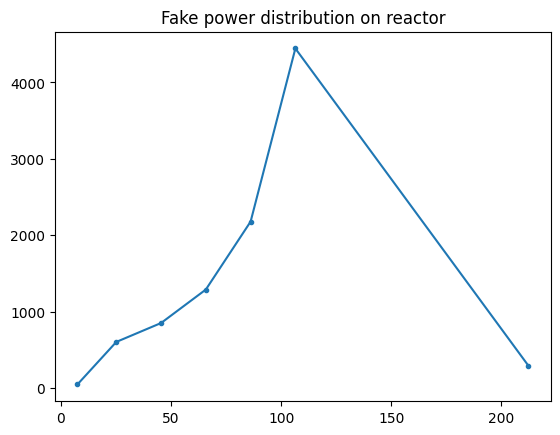

In [13]:
import matplotlib.pyplot as plt
a = b.parent
z = [b.spatialLocator.getGlobalCoordinates()[2] for b in a]
power = a.getChildParamValues('power')
plt.plot(z,power,'.-')
plt.title("Fake power distribution on reactor")

We can take a look at the spatial distribution as well:

In [14]:
from armi.utils import plotting
# Note, if you were plotting outside jupyter, you could click
# on different depths at the bottom to view different axial planes.
plotting.plotBlockDepthMap(core, "power", depthIndex=5)

## Modifying number densities
Analysts frequently want to modify number densities. For example, if you needed to compute a coolant density coefficient, you could simply reduce the amount of coolant in the core. 

In [15]:
sodiumBefore = core.getMass('NA')
print(f"Before: {sodiumBefore/1e6:.2f} MT Sodium")
for b in core.getBlocks():      # loop through all blocks
    refDens = b.getNumberDensity('NA23')
    b.setNumberDensity('NA23',refDens*0.98) # reduce Na density by 2%
sodiumAfter = core.getMass('NA')
print(f"After:  {sodiumAfter/1e6:.2f} MT Sodium")

Before: 2.48 MT Sodium
After:  2.43 MT Sodium


If you analyze the keff with a physics plugin before and after, the change in the `core.p.keff` param would determine your density coefficient of reactivity. 

## Saving state to disk
During analysis, it's often useful to save the reactor state to disk in a database. The ARMI database package handles this, and writes it out to an [HDF-formatted](https://en.wikipedia.org/wiki/Hierarchical_Data_Format) file. This is typically done automatically at each point in time in a normal simulation, and can also be done manually, like this:

In [16]:
dbi = o.getInterface("database")
dbi.initDB()
dbi.database.writeToDB(o.r)

[info] Opening database file at /home/runner/.armi/0-20240516164811244148/anl-afci-177.h5


[info] Writing to database for statepoint: /c00n00


## Fuel management
One plugin that comes with the framework is the Fuel Handler. It attaches the Fuel Handler interface, which we can grab now to move fuel around. In a typical ARMI run, the detailed fuel management choices are specified by the user-input custom shuffle logic file. In this particular example, we will simply swap the 10 highest-power fuel assemblies with the 10 lowest-power ones. 

In [17]:
from armi.physics.fuelCycle import fuelHandlers
fh = fuelHandlers.fuelHandlerFactory(o)

In [18]:
moved = []
for n in range(10):
    high = fh.findAssembly(param="power", compareTo=1.0e6, blockLevelMax=True, exclusions=moved)
    low = fh.findAssembly(param="power", compareTo=0.0, blockLevelMax=True, exclusions=moved)
    fh.swapAssemblies(high, low)
    moved.extend([high, low])

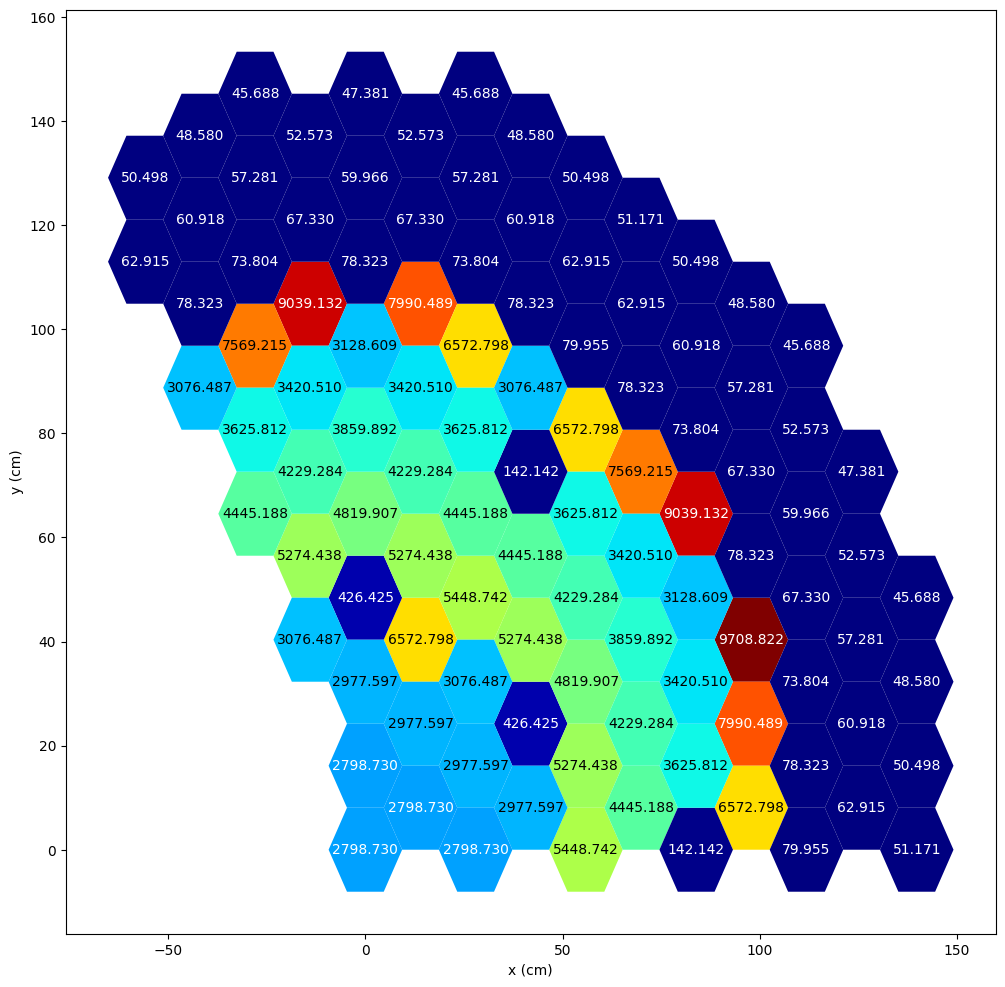

In [19]:
plotting.plotBlockDepthMap(core, "power", depthIndex=5)
# You can also plot total assembly params, which are the sum of block params
plotting.plotFaceMap(core, "power", vals='sum')

We can write this new state to DB as well, since we've shuffled the fuel

In [20]:
o.r.p.timeNode +=1
dbi.database.writeToDB(o.r)
dbi.database.close()

[info] Writing to database for statepoint: /c00n01


## Loading from the database
Once you have a database, you can use it to load a Reactor object from any of the states that were written to it. First, create a Database3 object, then open it and call its `load()` method.

In [21]:
from armi.bookkeeping import db
databaseLocation = "anl-afci-177.h5"
cycle, timeNode = 0, 1
dbo = db.databaseFactory(databaseLocation, "r")
with dbo:
    # Load a new reactor object from the requested cycle and time node
    r = dbo.load(cycle, timeNode)

[info] Loading reactor state for time node (0, 1)


[info] Applying <Migration from 0.1.2: Removes now-invalid `centers:` lines fro...


[info] Removing `centers:` sections.


[info] Applying <Migration from 0.1.2: Update elemental nuclide flags....


=========== Initializing Mesh, Assembly Zones, and Nuclide Categories ===========


[info] Will expand HE, NA, SI, CR, MN, FE, NI, ZR, MO, W elementals to have natural isotopics


[info] Constructing assembly `inner fuel`


[warn] Some component was missing in <reflector block-bol-000 at ExCore XS: A BU GP: A> so pin-to-duct gap not calculated


[info] Constructing assembly `middle core fuel`


[warn] Some component was missing in <reflector block-bol-000 at ExCore XS: B BU GP: A> so pin-to-duct gap not calculated


[info] Constructing assembly `outer core fuel`


[warn] Some component was missing in <reflector block-bol-000 at ExCore XS: C BU GP: A> so pin-to-duct gap not calculated


[info] Constructing assembly `radial reflector`


[warn] Some component was missing in <reflector block-bol-000 at ExCore XS: A BU GP: A> so pin-to-duct gap not calculated


[info] Constructing assembly `radial shield`


[info] Constructing assembly `control`


[info] Constructing assembly `ultimate shutdown`


=========== Verifying Assembly Configurations ===========


[info] Nuclide categorization for cross section temperature assignments:
       ------------------  -----------------------------------------------------------
       Nuclide Category    Nuclides
       ------------------  -----------------------------------------------------------
       Fuel                CM245, LFP40, ZR91, PU241, U234, ZR96, AM243, AM241, PU239,
                           PU236, LFP41, DUMP2, CM244, LFP39, HE4, DUMP1, U238, NP238,
                           U235, PU240, CM242, CM243, NP237, U236, LFP35, CM246,
                           CM247, AM242M, ZR90, PU242, LFP38, PU238, ZR94, ZR92
       Coolant             NA23
       Structure           NI58, SI28, MO98, W183, MN55, NI64, V, MO100,
                           FE58, NI62, CR50, W184, NI60, C, FE56, SI30,
                           FE54, CR52, FE57, NI61, MO96, MO95, MO92, B11,
                           MO97, MO94, B10, CR53, SI29, CR54, W186, W182
       ------------------  -------------------------------

We can see that the time node is what we expect (node 1), and there is some fission product mass since we loaded from a cycle after a depletion step.

In [22]:
print(r.p.timeNode)
print(o.r.getFissileMass())

1
909142.5216630063


Having a Reactor object by itself can be very useful for all sorts of post-processing tasks. However, sometimes we may wish initialize more ARMI components to do more advanced tasks and interactive follow-on analysis.  Lucky for us, the database stores the settings that were used to run the case in the first place. We can get them like this:

In [23]:
with dbo:
    cs = dbo.loadCS()
    print(cs["neutronicsKernel"])
    

With this `Settings` object, we could create a brand new `Case` and `Operator` and do all sorts of magic. This way of interacting with ARMI is rather advanced, and beyond the scope of this tutorial.

That's just a brief exploration of the data model. Hopefully it helped orient you to the underlying ARMI structure.